In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(
    "/Users/benoitmathey-doret/Documents/EPFL/ml-project-1-partie1team"
)

import datetime
from helpers import *
from implementation import *

In [2]:
datapath='/Users/benoitmathey-doret/Documents/EPFL/ML_course/projects/project1/data/dataset'

x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_path=datapath,sub_sample=False)

In [61]:
#Functions
def convert_weight_to_pounds(weight_column):
    # Initialize an array to store the converted weights
    converted_weights = np.zeros(len(weight_column))

    for i, weight in enumerate(weight_column):
        # Convert weights in pounds (50–999)
        if 50 <= weight <= 999:
            converted_weights[i] = weight

        # Convert weights in kilograms (9000–9998) to pounds
        elif 9000 <= weight <= 9998:
            kg_value = weight - 9000  # Remove leading '9'
            pounds_value = kg_value * 2.20462  # Convert to pounds
            converted_weights[i] = pounds_value
    return converted_weights

def convert_height_to_inches(height_column):
    # Initialize an array to store the converted heights
    converted_heights = np.zeros(len(height_column))

    for i, height in enumerate(height_column):
        # Convert heights in feet and inches (200–711)
        if 200 <= height <= 711:
            feet = height // 100           # Extract the 'feet' part
            inches = height % 100          # Extract the 'inches' part
            total_inches = (feet * 12) + inches  # Convert to inches
            converted_heights[i] = total_inches

        # Convert heights in meters and centimeters (9000–9998)
        elif 9000 <= height <= 9998:
            cm_value = height - 9000         # Remove leading '9'
            inches_value = cm_value / 2.54   # Convert centimeters to inches
            converted_heights[i] = inches_value
    return converted_heights

In [65]:
def ProcessFullData(dataset):
    #remove IDATE, SEQNO, _PSU
    data=np.delete(dataset, [2,7,8], axis=1)

    #print features names
    with open(datapath+'/x_train.csv', newline='') as csvfile: 
        csv_reader = csv.reader(csvfile)
        feature_names = next(csv_reader)
    feature_names=feature_names[1:]
    feature_names=np.delete(feature_names, [2,7,8])
    #print(feature_names)

    # #process weight abd height
    INDEX=np.array(range(data.shape[1]))
    idx_weight=INDEX[feature_names=='WEIGHT2']
    idx_height=INDEX[feature_names=='HEIGHT3']
    print(idx_height,idx_weight)

    weight_pounds=convert_weight_to_pounds(data[:,idx_weight])
    data[:,idx_weight]=np.expand_dims(weight_pounds,axis=1)

    height_inshes=convert_height_to_inches(data[:,idx_height])
    data[:,idx_height]=np.expand_dims(height_inshes, axis=1)

    INDEX=np.array(range(data.shape[1]))

    #9-----------------------------
    index9=np.array(range(data.shape[1]))

    indexA9=index9[np.any(data>9, axis=0)]
    Above9=data[:,indexA9]
    print(Above9.shape)

    indexB=index9[~np.any(data>9, axis=0)]
    Below9=data[:,indexB]

    print(Below9.shape)

    #Fill NAN values with 9
    Below9[np.isnan(Below9)]=9
    print('Number of missing values: ',np.isnan(Below9).sum())

    #99-----------------------------
    index99=np.array(range(Above9.shape[1]))

    indexA99=index99[np.any(Above9>99, axis=0)]
    Above99=Above9[:,indexA99]
    print(Above99.shape)

    indexB99=index99[~np.any(Above9>99, axis=0)]
    Below99=Above9[:,indexB99]
    print(Below99.shape)

    Below99[np.isnan(Below99)]=99
    print('Number of missing values: ',np.isnan(Below99).sum())
    #999---------------------------
    index999=np.array(range(Above99.shape[1]))

    indexA999=index999[np.any(Above99>999, axis=0)]
    Above999=Above99[:,indexA999]
    print(Above999.shape)

    indexB999=index999[~np.any(Above99>999, axis=0)]
    Below999=Above99[:,indexB999]
    print(Below999.shape)

    Below999[np.isnan(Below999)]=999
    print('Number of missing values: ',np.isnan(Below999).sum())

    #9999---------------------------
    index9999=np.array(range(Above999.shape[1]))

    indexA9999=index9999[np.any(Above999>9999, axis=0)]
    Above9999=Above999[:,indexA9999]
    print(Above9999.shape)

    indexB9999=index9999[~np.any(Above999>9999, axis=0)]
    Below9999=Above999[:,indexB9999]
    print(Below9999.shape)

    Below9999[np.isnan(Below9999)]=9999
    print('Number of missing values: ',np.isnan(Below9999).sum())

    #99999---------------------------
    index99999=np.array(range(Above9999.shape[1]))

    indexA99999=index99999[np.any(Above9999>99999, axis=0)]
    Above99999=Above9999[:,indexA99999]
    print(Above99999.shape)

    indexB99999=index99999[~np.any(Above9999>99999, axis=0)]
    Below99999=Above9999[:,indexB99999]
    print(Below99999.shape)

    Below99999[np.isnan(Below99999)]=99999
    print('Number of missing values: ',np.isnan(Below99999).sum())

    #999999---------------------------
    index999999=np.array(range(Above99999.shape[1]))

    indexA999999=index999999[np.any(Above99999>999999, axis=0)]
    Above999999=Above99999[:,indexA999999]
    print(Above999999.shape)

    indexB999999=index999999[~np.any(Above99999>999999, axis=0)]
    Below999999=Above99999[:,indexB999999]
    print(Below999999.shape)

    Below999999[np.isnan(Below999999)]=999999
    print('Number of missing values: ',np.isnan(Below999999).sum())

    #put all together and shuffle
    dataset_filled=np.concatenate((Below9, Below99, Below999, Below9999, Below99999, Below999999), axis=1)
    shuffled_indices = np.random.permutation(dataset_filled.shape[1])
    dataset_filled=dataset_filled[:,shuffled_indices]
    print(dataset_filled.shape)


    #normaliser et detrend
    means=np.mean(dataset_filled, axis=0)
    std=np.std(dataset_filled, axis=0)
    dataset_filled_norm=(dataset_filled-means)/std
    dataset_filled_norm
    
    return dataset_filled_norm

In [67]:
x_train_clean=ProcessFullData(x_train)
x_test_clean=ProcessFullData(x_test)

np.savetxt("Datasets/x_train_FullClean.csv", x_train_clean, delimiter=",", fmt='%d')
np.savetxt("Datasets/x_test_FullClean.csv", x_test_clean, delimiter=",", fmt='%d')
np.savetxt("Datasets/y_train_FullClean.csv", y_train, delimiter=",", fmt='%d')



[60] [59]


/var/folders/gm/941r48zd5qxcl4tb3v9q30440000gn/T/ipykernel_2369/2361791162.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  converted_weights[i] = weight
/var/folders/gm/941r48zd5qxcl4tb3v9q30440000gn/T/ipykernel_2369/2361791162.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  converted_weights[i] = pounds_value
/var/folders/gm/941r48zd5qxcl4tb3v9q30440000gn/T/ipykernel_2369/2361791162.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  converted_heights[i]

(328135, 109)
(328135, 209)
Number of missing values:  0
(328135, 43)
(328135, 66)
Number of missing values:  0
(328135, 19)
(328135, 24)
Number of missing values:  0
(328135, 14)
(328135, 5)
Number of missing values:  0
(328135, 3)
(328135, 11)
Number of missing values:  0
(328135, 0)
(328135, 3)
Number of missing values:  0
(328135, 318)
[60] [59]
(109379, 107)
(109379, 211)
Number of missing values:  0
(109379, 44)
(109379, 63)
Number of missing values:  0
(109379, 18)
(109379, 26)
Number of missing values:  0
(109379, 13)
(109379, 5)
Number of missing values:  0
(109379, 3)
(109379, 10)
Number of missing values:  0
(109379, 0)
(109379, 3)
Number of missing values:  0
(109379, 318)


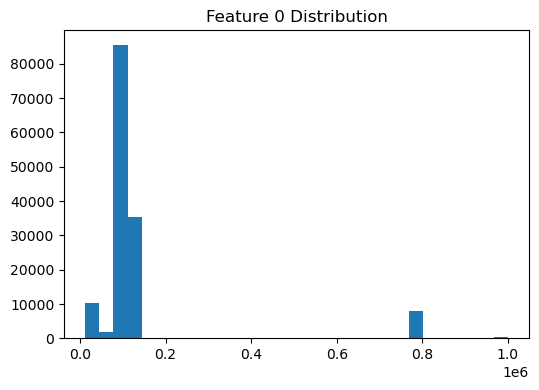

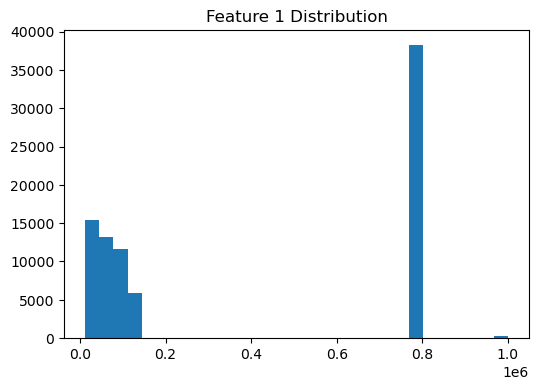

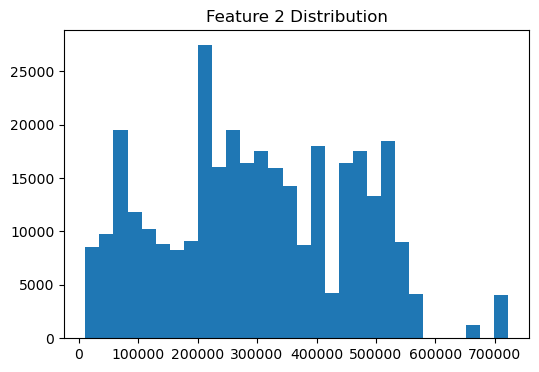

In [22]:
#handle >99 
for idx, i in enumerate(indexA99999):
    plt.figure(figsize=(6, 4))
    plt.hist(Above99999[:,idx], bins=30)
    plt.title(f'Feature {i} Distribution')
    plt.show()
    
